In [ ]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image
import scipy.stats as stats
import math
import pylab 
import scipy

In [ ]:
lunar = pd.read_table('lunar_finale.csv', na_values='NA', delimiter=',')
lunar.head(5)

,Unnamed: 0,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m),Latitude3,Longitude3,Time JD
0,0,46437,-49456,17,0,9,-1.0981,0.8791,-0.1922,268.8,0.0,0.0,-24,-22,991100.092685
1,1,46427,-49451,-16,0,0,-1.1155,0.8143,-0.1921,233.4,0.0,0.0,15,-98,991248.349873
2,2,46416,-49445,-11,4,3,0.8988,1.2105,0.2069,281.7,102.7,0.0,-13,89,991424.741389
3,3,46404,-49439,-6,4,0,-0.4644,2.0382,0.9740,343.4,200.8,0.0,12,113,991602.719421
4,4,46392,-49433,-1,6,7,0.1003,2.6513,1.6963,322.8,213.5,98.2,-11,-92,991779.289595


In [ ]:
predictors=lunar[['Gamma', 'Quincena Solar Eclipse', 'Eclipse Type', 'Total Eclipse Duration (m)', 'Partial Eclipse Duration (m)', 'Lunation Number']]
y=lunar[['Saros Number', 'Umbral Magnitude', 'Penumbral Magnitude', 'Penumbral Eclipse Duration (m)']]

In [ ]:
predictors.columns = ["V"+str(i) for i in range(1, len(predictors.columns)+1)]
data=predictors
data[['V7','V8','V9','V10']]=y
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-1.0981,9,0,0.0,0.0,-49456,17,-0.1922,0.8791,268.8
1,-1.1155,0,0,0.0,0.0,-49451,-16,-0.1921,0.8143,233.4
2,0.8988,3,4,0.0,102.7,-49445,-11,0.2069,1.2105,281.7
3,-0.4644,0,4,0.0,200.8,-49439,-6,0.9740,2.0382,343.4
4,0.1003,7,6,98.2,213.5,-49433,-1,1.6963,2.6513,322.8


In [ ]:
distributions = [stats.gennorm, stats.gennorm, stats.mielke, stats.loggamma]

In [ ]:
def get_bin_count(feature):
    n = feature.shape[0]
    return np.round(5 * np.log(n)).astype('int')

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


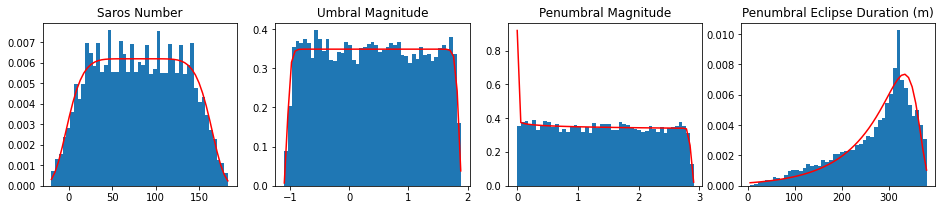

In [ ]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
x_sar = np.linspace(data.V7.min(), data.V7.max())
params_sar = stats.gennorm.fit(data.V7)
pdf_sar = stats.gennorm.pdf(x_sar, *params_sar)
axes[0].hist(data.V7, bins=get_bin_count(data.V7), density=True)
axes[0].plot(x_sar, pdf_sar, 'r')
axes[0].title.set_text('Saros Number')

x_umbra = np.linspace(data.V8.min(), data.V8.max())
params_umbra = stats.gennorm.fit(data.V8)
pdf_umbra = stats.gennorm.pdf(x_umbra, *params_umbra)
axes[1].hist(data.V8, bins=get_bin_count(data.V8), density=True)
axes[1].plot(x_umbra, pdf_umbra, 'r')
axes[1].title.set_text('Umbral Magnitude')

x_penmag = np.linspace(data.V9.min(), data.V9.max())
params_penmag = stats.mielke.fit(data.V9)
pdf_penmag = stats.mielke.pdf(x_penmag, *params_penmag)
axes[2].hist(data.V9, bins=get_bin_count(data.V9), density=True)
axes[2].plot(x_penmag, pdf_penmag, 'r')
axes[2].title.set_text('Penumbral Magnitude')

x_pendur = np.linspace(data.V10.min(), data.V10.max())
params_pendur = stats.loggamma.fit(data.V10)
pdf_pendur = stats.loggamma.pdf(x_pendur, *params_pendur)
axes[3].hist(data.V10, bins=get_bin_count(data.V10), density=True)
axes[3].plot(x_pendur, pdf_pendur, 'r')
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

In [ ]:
print(params_sar,params_umbra,params_penmag,params_pendur)

(6.977288186453667, 80.89254094651723, 86.24659560030366) (43.20772699819875, 0.4028287339703023, 1.452291730784363) (0.9755166369837356, 172.51943603194007, 0.000399999999999993, 2.8635746317649584) (0.2184524387297173, 360.6862889352457, 18.72886912264697)


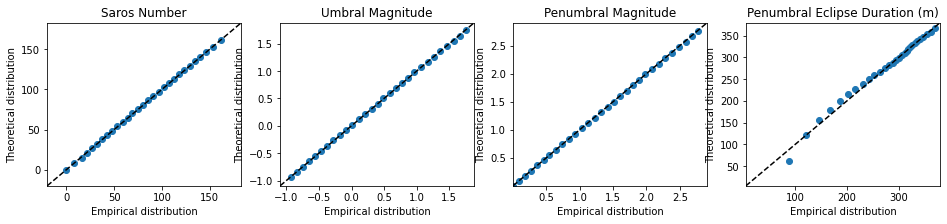

In [ ]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
x_sar = np.linspace(data.V7.min(), data.V7.max())
percs = np.linspace(0, 100, 31)
qn_sar = np.percentile(data.V7, percs)
qn_dist_sar = stats.gennorm.ppf(percs / 100.0, *params_sar)
axes[0].plot(qn_sar, qn_dist_sar, ls="", marker="o", markersize=6)
axes[0].plot(x_sar, x_sar, color="k", ls="--")
axes[0].set_xlim(data.V7.min(), data.V7.max())
axes[0].set_ylim(data.V7.min(), data.V7.max())
axes[0].set_xlabel('Empirical distribution')
axes[0].set_ylabel('Theoretical distribution')
axes[0].title.set_text('Saros Number')

x_umbra = np.linspace(data.V8.min(), data.V8.max())
percs = np.linspace(0, 100, 31)
qn_umbra = np.percentile(data.V8, percs)
qn_dist_umbra = stats.gennorm.ppf(percs / 100.0, *params_umbra)
axes[1].plot(qn_umbra, qn_dist_umbra, ls="", marker="o", markersize=6)
axes[1].plot(x_umbra, x_umbra, color="k", ls="--")
axes[1].set_xlim(data.V8.min(), data.V8.max())
axes[1].set_ylim(data.V8.min(), data.V8.max())
axes[1].set_xlabel('Empirical distribution')
axes[1].set_ylabel('Theoretical distribution')
axes[1].title.set_text('Umbral Magnitude')

x_penmag = np.linspace(data.V9.min(), data.V9.max())
percs = np.linspace(0, 100, 31)
qn_penmag = np.percentile(data.V9, percs)
qn_dist_penmag = stats.mielke.ppf(percs / 100.0, *params_penmag)
axes[2].plot(qn_penmag, qn_dist_penmag, ls="", marker="o", markersize=6)
axes[2].plot(x_penmag, x_penmag, color="k", ls="--")
axes[2].set_xlim(data.V9.min(), data.V9.max())
axes[2].set_ylim(data.V9.min(), data.V9.max())
axes[2].set_xlabel('Empirical distribution')
axes[2].set_ylabel('Theoretical distribution')
axes[2].title.set_text('Penumbral Magnitude')

x_pendur = np.linspace(data.V10.min(), data.V10.max())
percs = np.linspace(0, 100, 31)
qn_pendur = np.percentile(data.V10, percs)
qn_dist_pendur = stats.loggamma.ppf(percs / 100.0, *params_pendur)
axes[3].plot(qn_pendur, qn_dist_pendur, ls="", marker="o", markersize=6)
axes[3].plot(x_pendur, x_pendur, color="k", ls="--")
axes[3].set_xlim(data.V10.min(), data.V10.max())
axes[3].set_ylim(data.V10.min(), data.V10.max())
axes[3].set_xlabel('Empirical distribution')
axes[3].set_ylabel('Theoretical distribution')
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

Inverse-transform method for sampling

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5095: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: invalid value encountered in subtract
  return np.exp(c*x-np.exp(x)-sc.gammaln(c))


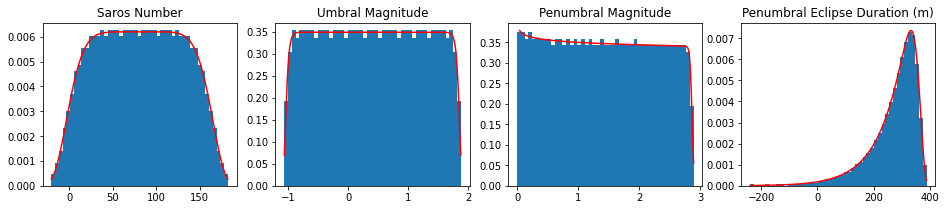

In [ ]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
percs = np.linspace(0, 100, 1000)
qn_dist_sar = stats.gennorm.ppf(percs / 100.0, *params_sar)
pdf_sample_sar = scipy.stats.gennorm.pdf(qn_dist_sar, *params_sar)
axes[0].plot(qn_dist_sar,pdf_sample_sar , 'r')
x_hist_sar=qn_dist_sar[1:qn_dist_sar.size-1]
axes[0].hist(x_hist_sar, bins=get_bin_count(data.V7), density=True)
#axes[0].hist(data.V7, bins=get_bin_count(data.V7), density=True)
axes[0].title.set_text('Saros Number')

qn_dist_umbra = stats.gennorm.ppf(percs / 100.0, *params_umbra)
pdf_sample_umbra = scipy.stats.gennorm.pdf(qn_dist_umbra, *params_umbra)
axes[1].plot(qn_dist_umbra,pdf_sample_umbra , 'r')
x_hist_umbra=qn_dist_umbra[1:qn_dist_umbra.size-1]
axes[1].hist(x_hist_umbra, bins=get_bin_count(data.V8), density=True)
#axes[1].hist(data.V8, bins=get_bin_count(data.V8), density=True)
axes[1].title.set_text('Umbral Magnitude')

qn_dist_penmag = stats.mielke.ppf(percs / 100.0, *params_penmag)
pdf_sample_penmag = scipy.stats.mielke.pdf(qn_dist_penmag, *params_penmag)
axes[2].plot(qn_dist_penmag,pdf_sample_penmag , 'r')
x_hist_penmag=qn_dist_penmag[1:qn_dist_penmag.size-1]
axes[2].hist(x_hist_penmag, bins=get_bin_count(data.V9), density=True)
#axes[2].hist(data.V9, bins=get_bin_count(data.V9), density=True)
axes[2].title.set_text('Penumbral Magnitude')

qn_dist_pendur = stats.loggamma.ppf(percs / 100.0, *params_pendur)
pdf_sample_pendur = scipy.stats.loggamma.pdf(qn_dist_pendur, *params_pendur)
axes[3].plot(qn_dist_pendur,pdf_sample_pendur , 'r')
x_hist_pendur=qn_dist_pendur[1:qn_dist_pendur.size-1]
axes[3].hist(x_hist_pendur, bins=get_bin_count(data.V10), density=True)
#axes[3].hist(data.V10, bins=get_bin_count(data.V10), density=True)
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

In [ ]:
import scipy.stats as st
ks_sar = st.kstest(lunar['Saros Number'], 'gennorm', params_sar, N=100)
ks_umbral = st.kstest(lunar['Umbral Magnitude'], 'gennorm', params_umbra, N=100)
ks_penmag = st.kstest(lunar['Penumbral Magnitude'], 'mielke', params_penmag, N=100)
ks_pendur = st.kstest(lunar['Penumbral Eclipse Duration (m)'], 'loggamma', params_pendur, N=100)
print('Kolmogorov-Smirnov Test for Saros Number:', ks_sar)
print('Kolmogorov-Smirnov Test for Umbral Magnitude:', ks_umbral)
print('Kolmogorov-Smirnov Test for Penumbral Magnitude:', ks_penmag)
print('Kolmogorov-Smirnov Test for Penumbral Eclipse Duration (m):', ks_pendur)

Kolmogorov-Smirnov Test for Saros Number: KstestResult(statistic=0.00908856435955474, pvalue=0.27187626827475486)
Kolmogorov-Smirnov Test for Umbral Magnitude: KstestResult(statistic=0.007153140894162524, pvalue=0.5676169996125715)
Kolmogorov-Smirnov Test for Penumbral Magnitude: KstestResult(statistic=0.006584513174423434, pvalue=0.6723169131195375)
Kolmogorov-Smirnov Test for Penumbral Eclipse Duration (m): KstestResult(statistic=0.031816504327442735, pvalue=4.938449163327354e-11)


Accept-Reject Method for sampling


In [ ]:
#normal PDF
def gauss(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

Text(0.5, 1.0, 'Saros Number')

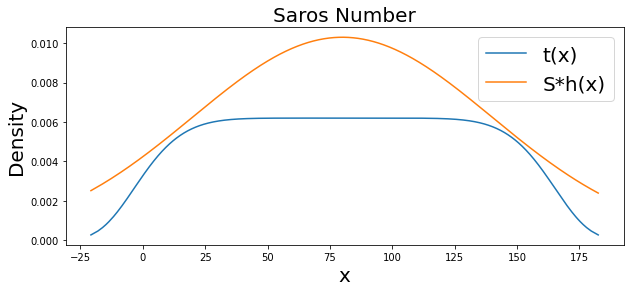

In [ ]:
x_vals_sar = np.linspace(np.min(data.V7), np.min(data.V7),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_sar = scipy.stats.gennorm.ppf(percs / 100.0, *params_sar)
f_vals_sar = scipy.stats.gennorm.pdf(qn_dist_sar, *params_sar)
g_vals_sar = gauss(qn_dist_sar, 80, 60)
M = 1.55

plt.figure(figsize=(10,4))
plt.plot(qn_dist_sar, f_vals_sar)
plt.plot(qn_dist_sar, M*g_vals_sar)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title('Saros Number', fontsize=20)

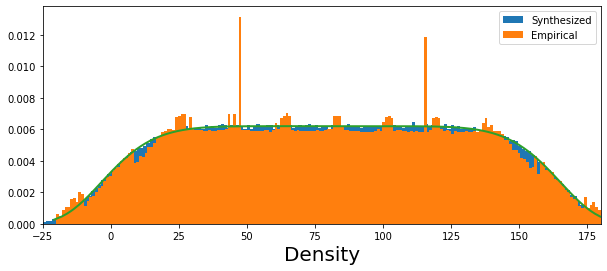

In [ ]:
samples_sar = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.normal(80, 60)
    prob_accept = scipy.stats.gennorm.pdf(candidate, *params_sar) / (M*gauss(candidate, 80, 60))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_sar.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_sar, bins=200, density=True, label='Synthesized')
plt.hist(data.V7, bins=200, density=True,label='Empirical')
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_sar, [f for f in f_vals_sar], linewidth=2)
plt.xlim(-25,180)
plt.legend()

In [ ]:
#uniform PDF
def unif(x, a, b):
    return (x-x+1)/(b-a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Umbral Magnitude')

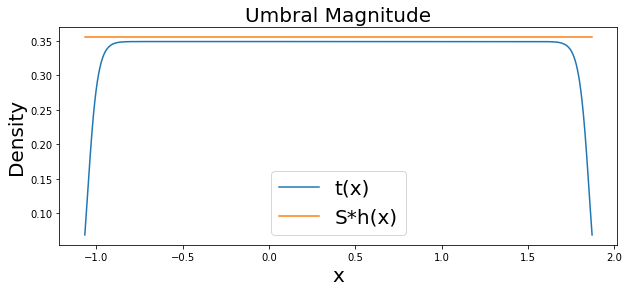

In [ ]:
x_vals_umbra = np.linspace(np.min(data.V8), np.min(data.V8),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_umbra = scipy.stats.gennorm.ppf(percs / 100.0, *params_umbra)
f_vals_umbra = scipy.stats.gennorm.pdf(qn_dist_umbra, *params_umbra)
g_vals_umbra = unif(qn_dist_umbra, -2, 2)
M = 1.42

plt.figure(figsize=(10,4))
plt.plot(qn_dist_umbra, f_vals_umbra)
plt.plot(qn_dist_umbra, M*g_vals_umbra)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title('Umbral Magnitude', fontsize=20)

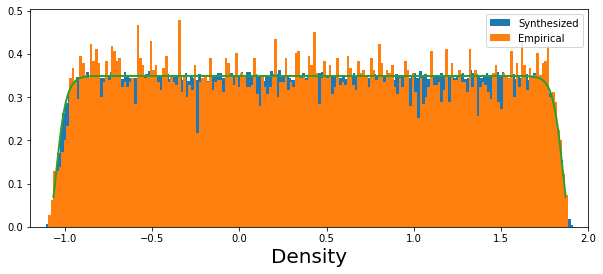

In [ ]:
samples_umbra = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.uniform(-2, 2)
    prob_accept = scipy.stats.gennorm.pdf(candidate, *params_umbra) / (M*unif(candidate, -2, 2))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_umbra.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_umbra, bins=200, density=True, label='Synthesized')
plt.hist(data.V8, bins=200, density=True,label='Empirical')
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_umbra, [f for f in f_vals_umbra], linewidth=2)
plt.xlim(-1.2,2)
plt.legend()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5095: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Penumbral Magnitude')

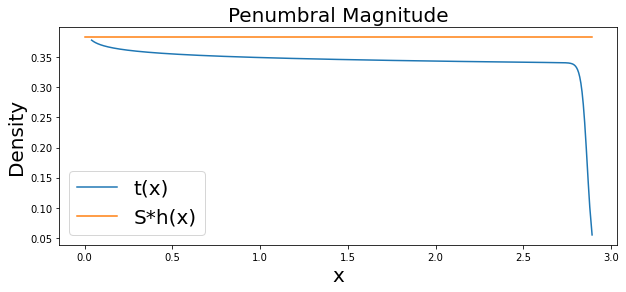

In [ ]:
x_vals_penmag = np.linspace(np.min(data.V9), np.min(data.V9),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_penmag = scipy.stats.mielke.ppf(percs / 100.0, *params_penmag)
f_vals_penmag = scipy.stats.mielke.pdf(qn_dist_penmag, *params_penmag)
g_vals_penmag = unif(qn_dist_penmag, 0, 3)
M = 1.15

plt.figure(figsize=(10,4))
plt.plot(qn_dist_penmag, f_vals_penmag)
plt.plot(qn_dist_penmag, M*g_vals_penmag)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title('Penumbral Magnitude', fontsize=20)

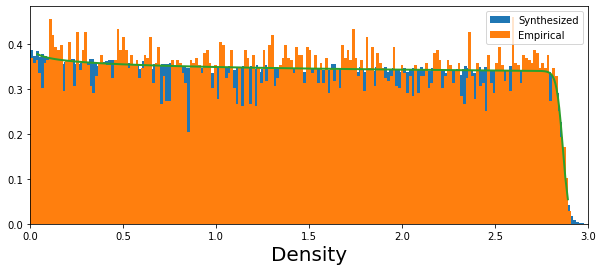

In [ ]:
samples_penmag = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.uniform(0, 3)
    prob_accept = scipy.stats.mielke.pdf(candidate, *params_penmag) / (M*unif(candidate, 0, 3))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_penmag.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_penmag, bins=200, density=True, label='Synthesized')
plt.hist(data.V9, bins=200, density=True,label='Empirical')
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_penmag, [f for f in f_vals_penmag], linewidth=2)
plt.xlim(0,3)
plt.legend()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: invalid value encountered in subtract
  return np.exp(c*x-np.exp(x)-sc.gammaln(c))


Text(0.5, 1.0, 'Penumbral Eclipse Duration (m)')

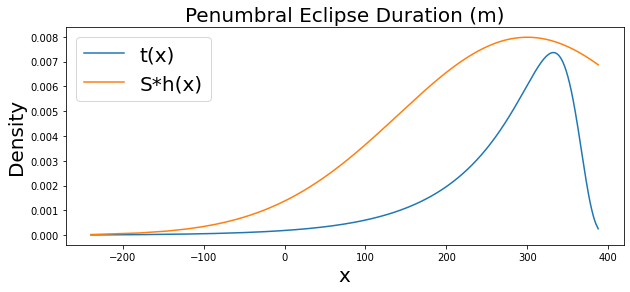

In [ ]:
x_vals_pendur = np.linspace(np.min(data.V10), np.min(data.V10),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_pendur = scipy.stats.loggamma.ppf(percs / 100.0, *params_pendur)
f_vals_pendur = scipy.stats.loggamma.pdf(qn_dist_pendur, *params_pendur)
g_vals_pendur = gauss(qn_dist_pendur, 300, 160)
M = 3.2

plt.figure(figsize=(10,4))
plt.plot(qn_dist_pendur, f_vals_pendur)
plt.plot(qn_dist_pendur, M*g_vals_pendur)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
#plt.xlim(-250,-200)
#plt.ylim(0, 0.0001)
plt.title('Penumbral Eclipse Duration (m)', fontsize=20)

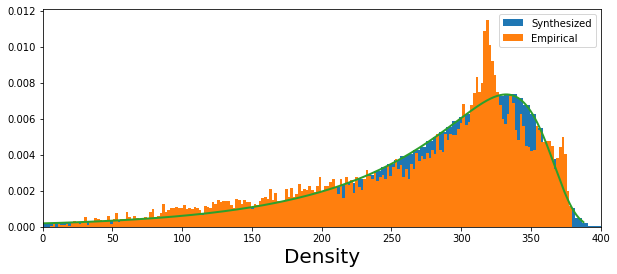

In [ ]:
samples_pendur = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.normal(300, 160)
    prob_accept = scipy.stats.loggamma.pdf(candidate, *params_pendur) / (M*gauss(candidate, 300, 160))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_pendur.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_pendur, bins=200, density=True, label='Synthesized')
plt.hist(data.V10, bins=200, density=True,label='Empirical')
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_pendur, [f for f in f_vals_pendur], linewidth=2)
plt.xlim(0,400)
plt.legend()